In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [9]:
df = pd.read_csv('/content/call_metrics_dataset.csv'  ,sep=';')

In [10]:
df.head()

,agent_id,date,product_id,lang_id,calls_handled,avg_aht,std_pass
0,10,2020-07-13,1,2,29,"754,75",1
1,6,2020-07-15,2,2,18,"432,03",1
2,10,2020-07-04,1,2,32,"1.325,75",0
3,4,2020-07-23,2,2,13,"545,04",1
4,2,2020-07-20,3,2,6,"86,19",0


#Explore

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   agent_id       270 non-null    int64 
 1   date           270 non-null    object
 2   product_id     270 non-null    int64 
 3   lang_id        270 non-null    int64 
 4   calls_handled  270 non-null    int64 
 5   avg_aht        270 non-null    object
 6   std_pass       270 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 14.9+ KB


In [13]:
df.isna().sum()

,0
agent_id,0
date,0
product_id,0
lang_id,0
calls_handled,0
avg_aht,0
std_pass,0


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.describe()

,agent_id,product_id,lang_id,calls_handled,std_pass
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,5.500000,2.000000,1.500000,19.992593,0.607407
std,2.877615,0.818013,0.500929,10.364363,0.489234
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3.000000,1.000000,1.000000,11.000000,0.000000
50%,5.500000,2.000000,1.500000,20.000000,1.000000
75%,8.000000,3.000000,2.000000,29.000000,1.000000
max,10.000000,3.000000,2.000000,39.000000,1.000000


#Clean

In [46]:
df['avg_aht'] = df['avg_aht'].str.replace(',' , '')
df['avg_aht'] = df['avg_aht'].astype('float')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   agent_id       270 non-null    int64  
 1   date           270 non-null    object 
 2   product_id     270 non-null    int64  
 3   lang_id        270 non-null    int64  
 4   calls_handled  270 non-null    int64  
 5   avg_aht        270 non-null    float64
 6   std_pass       270 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 14.9+ KB


#Analysis

In [20]:
# we have 10 agents
df['agent_id'].value_counts()

,count
agent_id,
10,27
6,27
4,27
2,27
9,27
3,27
7,27
8,27
1,27


In [18]:
# we have 3 products
df['product_id'].value_counts()

,count
product_id,
1,90
2,90
3,90


In [19]:
# we have 2 language
df['lang_id'].value_counts()

,count
lang_id,
2,135
1,135


<Axes: title={'center': 'Calls over time'}, xlabel='date'>

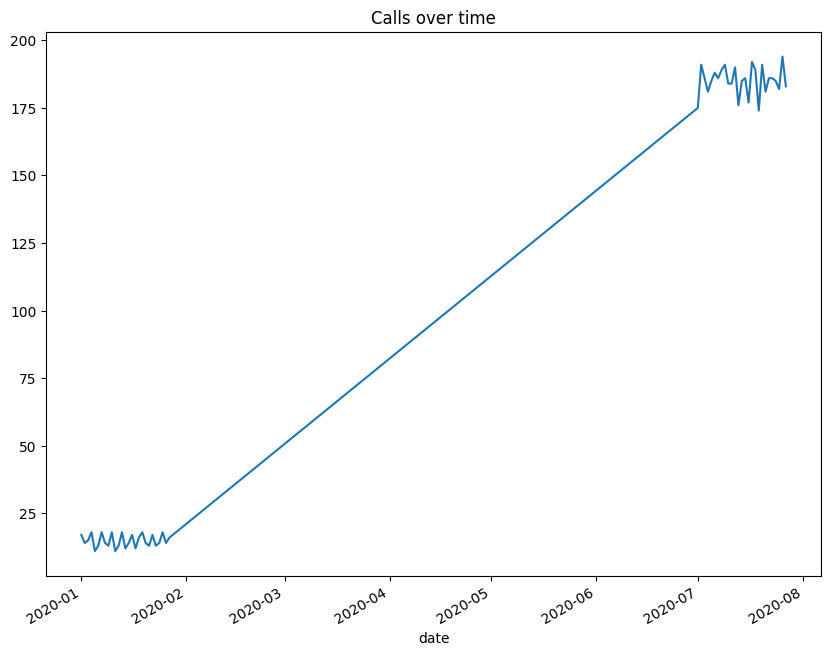

In [71]:
plt.figure(figsize=(10,8))
df['date'] = pd.to_datetime(df['date'])
df.groupby('date')['calls_handled'].sum().plot(title='Calls over time')

In [22]:
# total number of calls for each agent
agent_calls = df.groupby('agent_id')['calls_handled'].sum()
agent_calls

,calls_handled
agent_id,
1,188
2,116
3,401
4,311
5,580
6,496
7,759
8,695
9,966


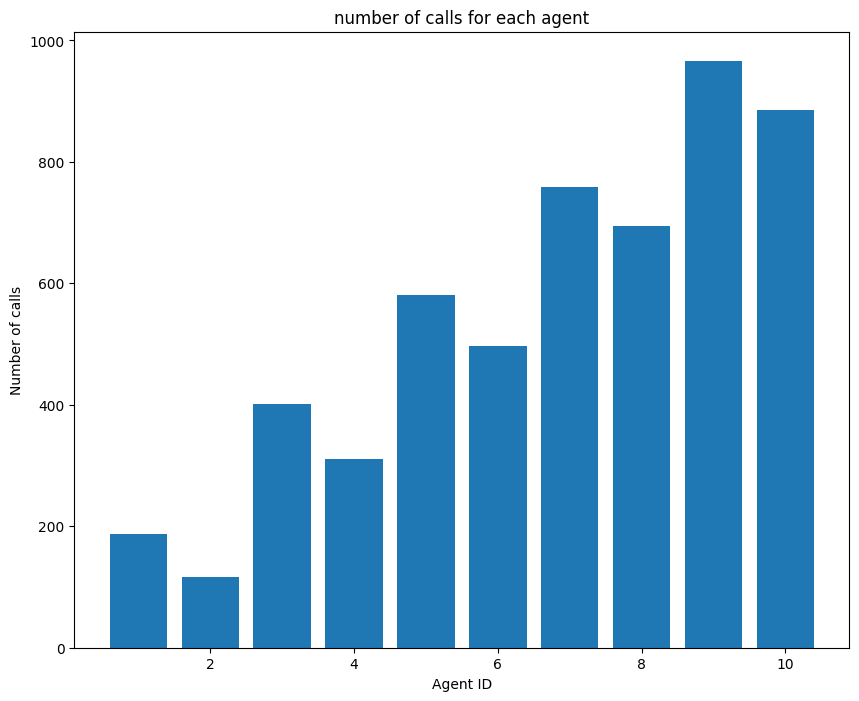

In [41]:
plt.figure(figsize=(10,8))
plt.bar(agent_calls.index ,  agent_calls.values)
plt.xlabel('Agent ID')
plt.ylabel('Number of calls')
plt.title('number of calls for each agent')
plt.show()

<Axes: ylabel='avg_aht'>

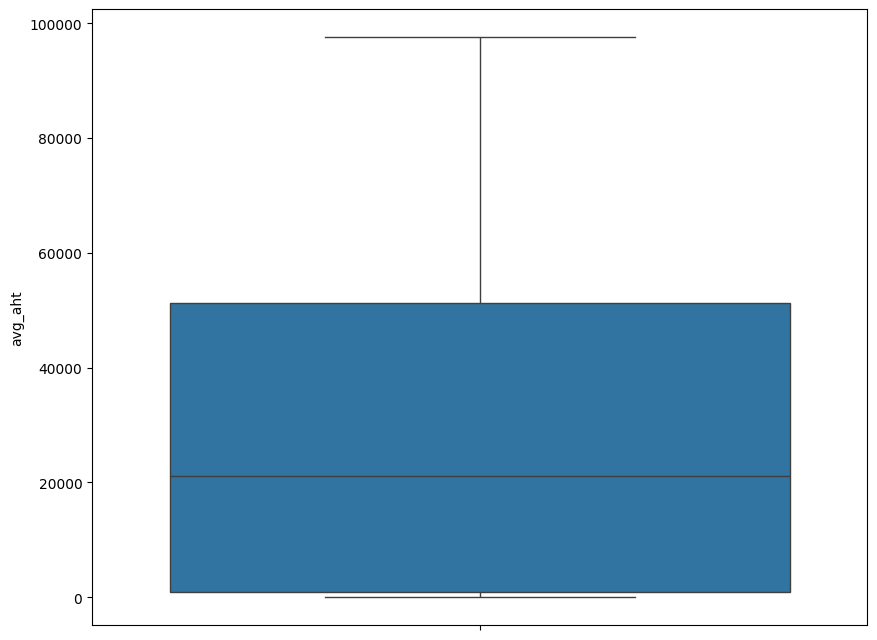

In [53]:
plt.figure(figsize=(10,8))
sns.boxplot(df['avg_aht'])

In [56]:
# Average Handle Time for each agent
agent_aht = df.groupby('agent_id')['avg_aht'].mean()
agent_aht

,avg_aht
agent_id,
1,22726.854759
2,26720.666667
3,40693.192375
4,35554.814815
5,30864.229380
6,34111.751163
7,24606.632906
8,30329.354820
9,26894.180075


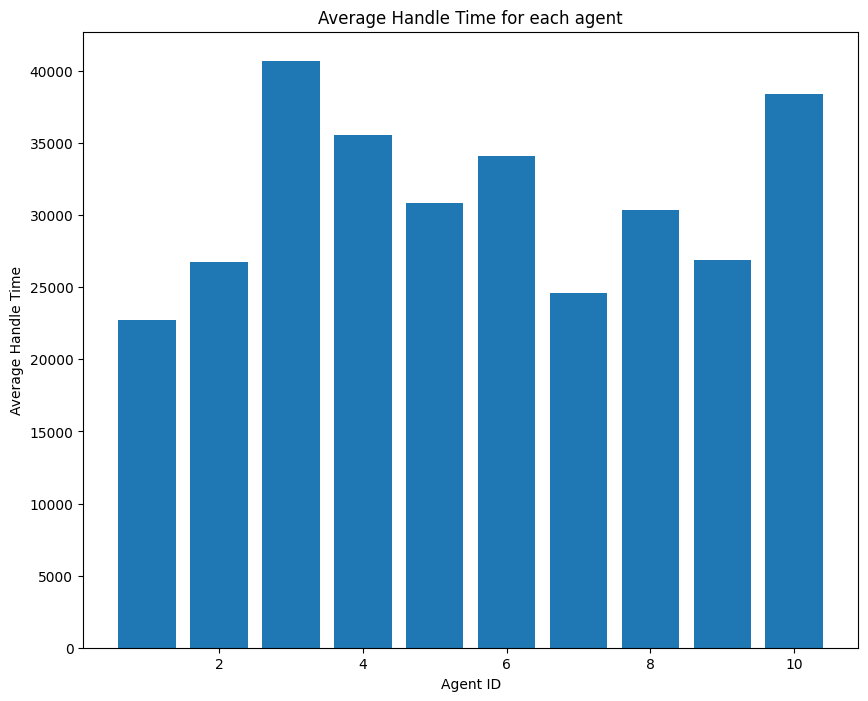

In [60]:
plt.figure(figsize=(10,8))
plt.bar(agent_aht.index ,  agent_aht.values)
plt.xlabel('Agent ID')
plt.ylabel('Average Handle Time')
plt.title('Average Handle Time for each agent')
plt.show()

In [62]:
agent_stdpass = df.groupby('agent_id')['std_pass'].sum()
agent_stdpass

,std_pass
agent_id,
1,0
2,0
3,18
4,17
5,18
6,27
7,20
8,23
9,18


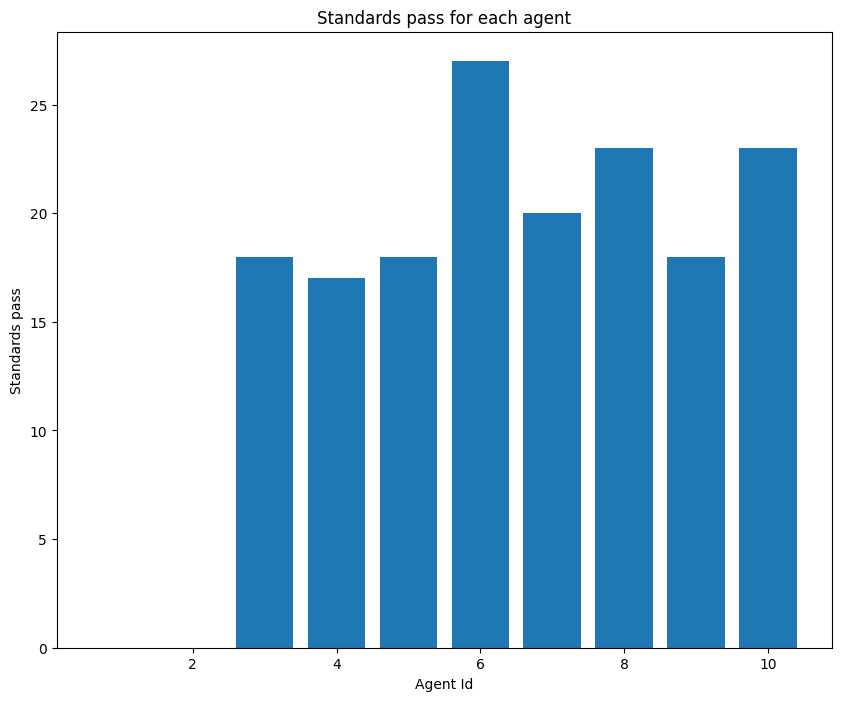

In [64]:
#Standards pass for each agent
plt.figure(figsize=(10,8))
plt.bar(agent_stdpass.index , agent_stdpass.values)
plt.xlabel('Agent Id')
plt.ylabel('Standards pass')
plt.title('Standards pass for each agent')
plt.show()

In [67]:
df[['avg_aht', 'calls_handled']].corr()


,avg_aht,calls_handled
avg_aht,1.000000,0.029848
calls_handled,0.029848,1.000000


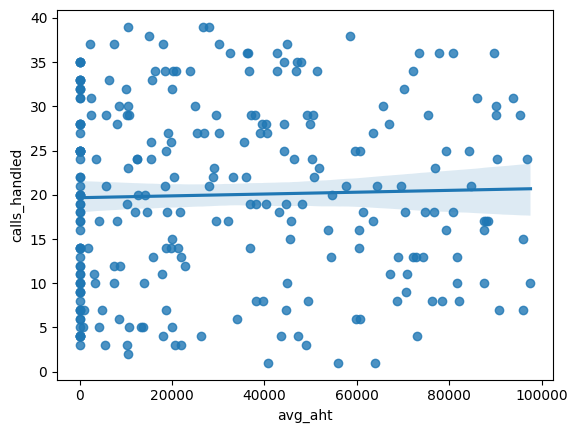

In [73]:
#The relationship between AHT and calls_handled
import seaborn as sns
sns.regplot(x='avg_aht', y='calls_handled', data=df)
plt.show()